 <h1 style="text-align: center; color: RED">VERİ ANALİZİ</h1> 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 <span style="color: blue; font-weight: bold;">Loading our data:</span> :

In [8]:
df = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Patikadev-Kız Başına Bootcamp\\3.Hafta\\.ipynb_checkpoints\\sales_data.csv",parse_dates=['Date'])

 <span style="color: blue; font-weight: bold;">The data at a glance:</span> :

In [10]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


**NOT**: parse_dates=['Date'] Bu parametre, pandas.read_csv() fonksiyonuna verdiğimiz CSV dosyasındaki tarih sütunlarını otomatik olarak datetime formatına çevirmesini söyler.

CSV dosyalarındaki tarih verileri genellikle metin (string) olarak gelir. Ancak analiz yaparken bu tarihleri gün, ay, yıl, hafta, çeyrek gibi parçalara ayırmak, sıralamak ya da filtrelemek isteriz. İşte bu noktada tarihlerin datetime64 formatına çevrilmesi gerekir.

In [14]:
df.shape

(113036, 18)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,113036,2014-11-23 12:14:55.063519232,2011-01-01 00:00:00,2013-12-22 00:00:00,2014-06-27 00:00:00,2016-01-09 00:00:00,2016-07-31 00:00:00,NaN
Day,113036.0,15.665753,1.0,8.0,16.0,23.0,31.0,8.781567
Year,113036.0,2014.401739,2011.0,2013.0,2014.0,2016.0,2016.0,1.27251
Customer_Age,113036.0,35.919212,17.0,28.0,35.0,43.0,87.0,11.021936
Order_Quantity,113036.0,11.90166,1.0,2.0,10.0,20.0,32.0,9.561857
Unit_Cost,113036.0,267.296366,1.0,2.0,9.0,42.0,2171.0,549.835483
Unit_Price,113036.0,452.938427,2.0,5.0,24.0,70.0,3578.0,922.071219
Profit,113036.0,285.051665,-30.0,29.0,101.0,358.0,15096.0,453.887443
Cost,113036.0,469.318695,1.0,28.0,108.0,432.0,42978.0,884.866118
Revenue,113036.0,754.37036,2.0,63.0,223.0,800.0,58074.0,1309.094674


 <span style="color: blue; font-weight: bold;">Numerical analysis and visualization</span> :

We'll analyze the Unit_Cost column:
 

In [20]:
df['Unit_Cost'].describe

<bound method NDFrame.describe of 0         45
1         45
2         45
3         45
4         45
          ..
113031    24
113032    24
113033    24
113034    24
113035    24
Name: Unit_Cost, Length: 113036, dtype: int64>

In [32]:
df['Unit_Cost'].mean()

267.296365759581

In [36]:
df['Unit_Cost'].median()

9.0

<Axes: >

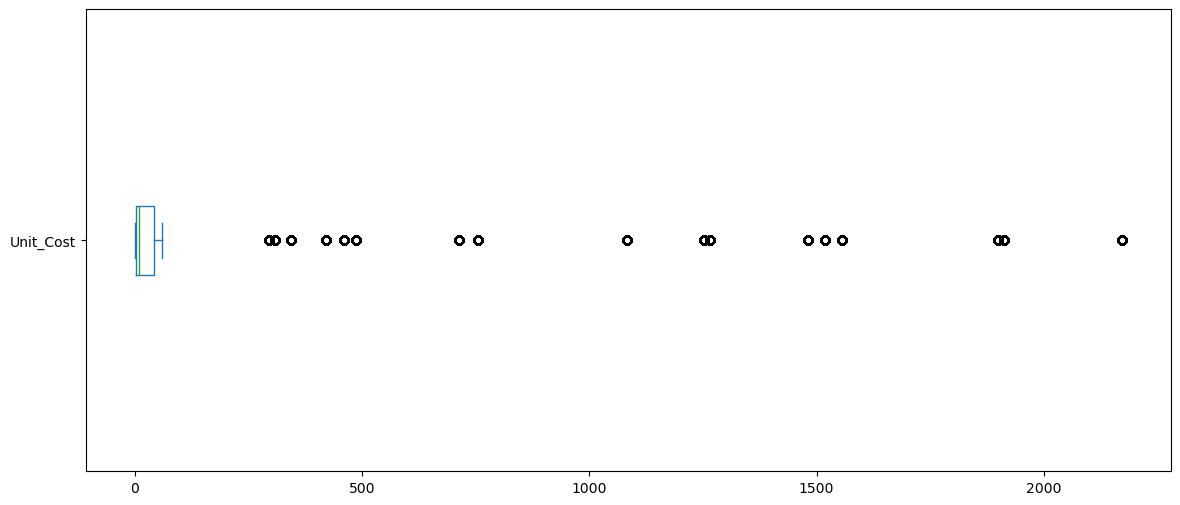

In [38]:
df['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

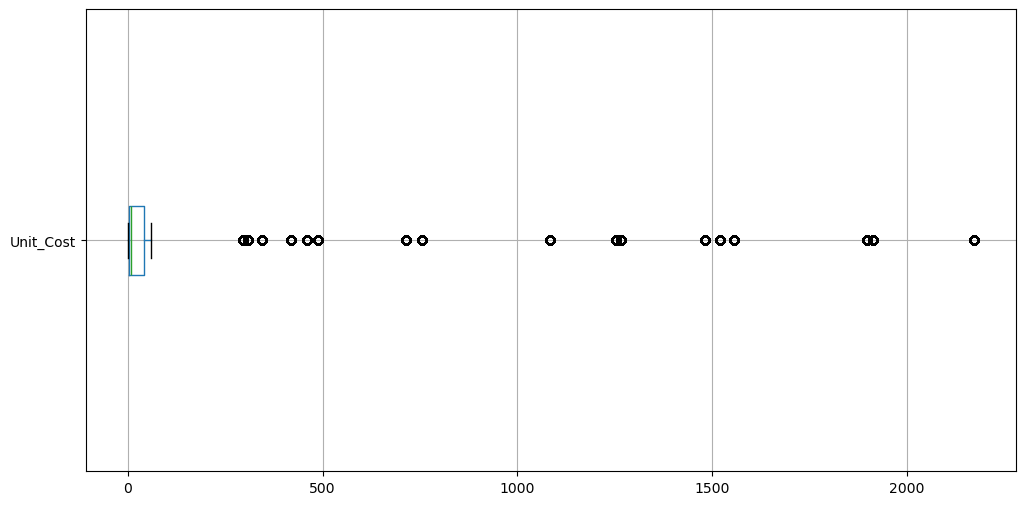

In [48]:
#başka yöntem
df.boxplot(column='Unit_Cost',  vert=False, figsize=(12,6))
plt.show()

<Axes: ylabel='Density'>

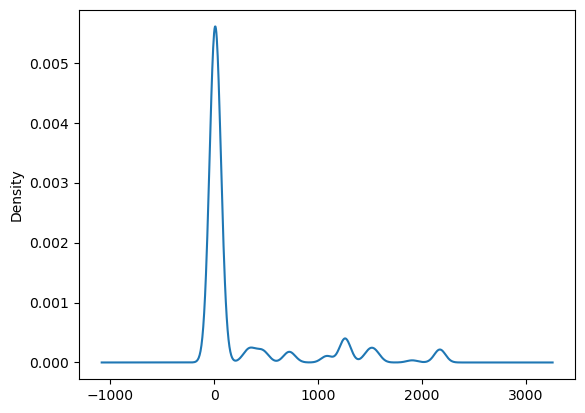

In [52]:
df['Unit_Cost'].plot(kind='density')#kde

**NOT**: Density Plot (Türkçesiyle yoğunluk grafiği), bir değişkenin olasılık yoğunluk fonksiyonunu (Probability Density Function, PDF) gösterir. Bu grafik:

Histogram gibi dağılımı gösterir ama daha pürüzsüz ve sürekli bir çizgiyle.

Altında kalan alan 1 olacak şekilde ölçeklenmiştir (çünkü bu bir olasılık dağılımıdır).

Veri hangi değerde daha çok yoğunlaşmış, onu gösterir.

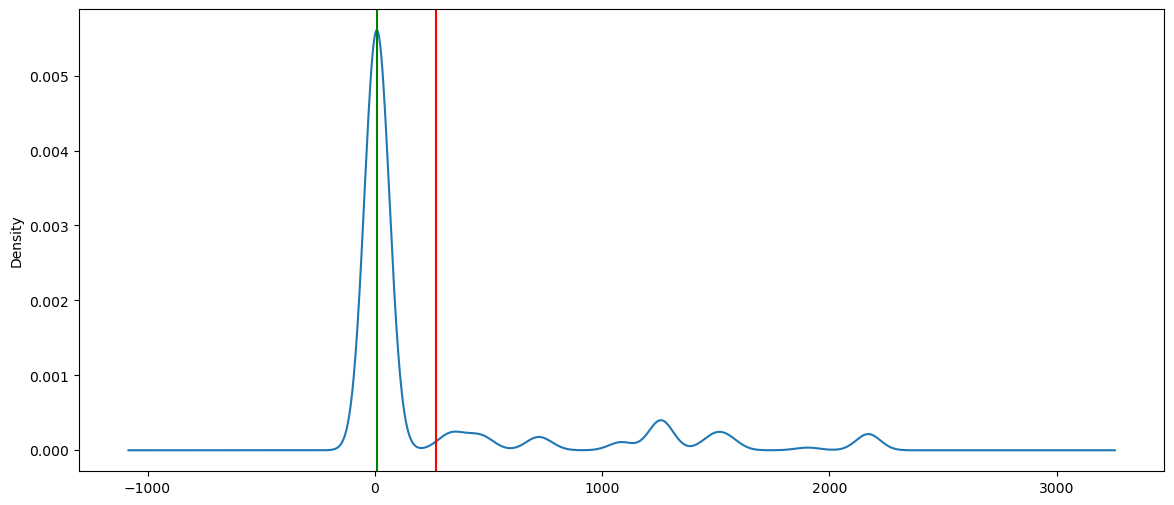

In [57]:
ax = df['Unit_Cost'].plot(kind='density',figsize=(14,6))
ax.axvline(df['Unit_Cost'].mean(),color='red')
ax.axvline(df['Unit_Cost'].median(),color='green')

**NOT**:Density plot: Verinin dağılımını yumuşak şekilde görmemizi sağlar.

axvline(): Dikey çizgilerle önemli noktaları işaretleriz (ortalama, medyan, vs.).

Görselleştirme sırasında bu tür referans çizgileri analizi çok daha sezgisel hale getirir.

Ortalama ≈ Medyan ise → dağılım simetriktir.

Ortalama > Medyan → sağa çarpık dağılım (right-skewed)

Ortalama < Medyan → sola çarpık dağılım (left-skewed)

Text(0.5, 0, 'dollars')

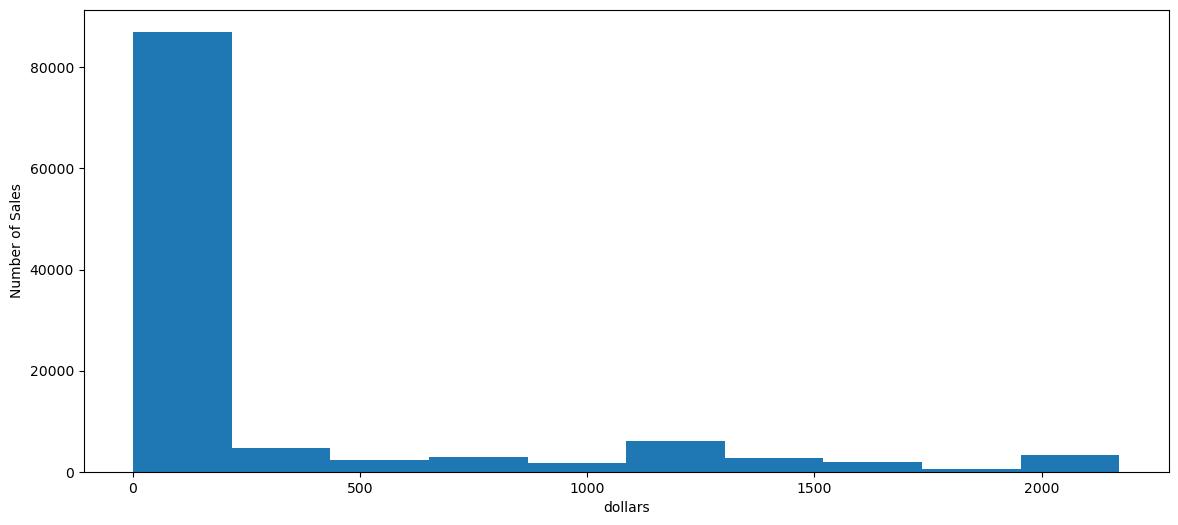

In [62]:
ax = df['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

 <span style="color: blue; font-weight: bold;">Categorical analysis and visualization</span> :

 We'll analyze the Age_Group column:

In [67]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [69]:
df['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

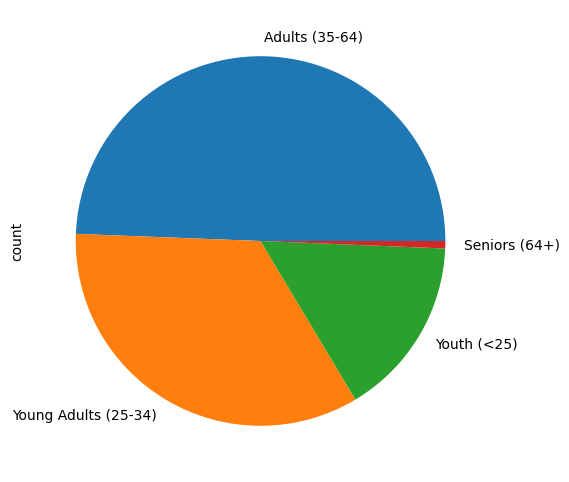

In [71]:
df['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='Age_Group'>

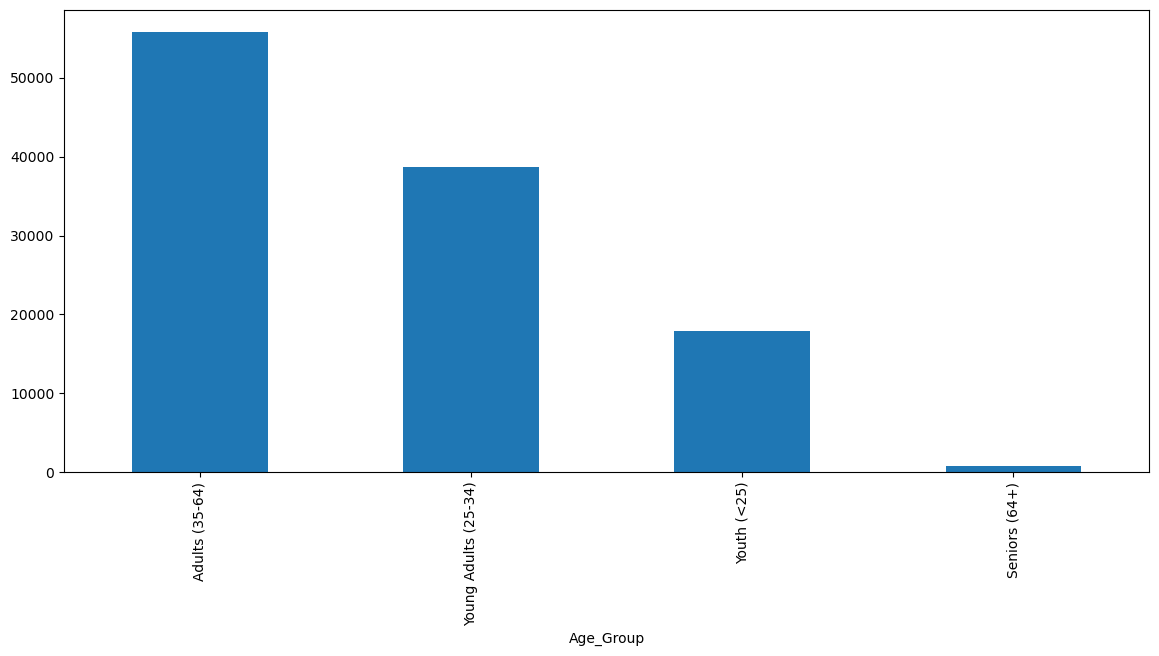

In [73]:
df['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

 <span style="color: blue; font-weight: bold;">Relationship between the columns?</span> 

 Can we find any significant relationship?

In [80]:
corr = df.select_dtypes(include='number').corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


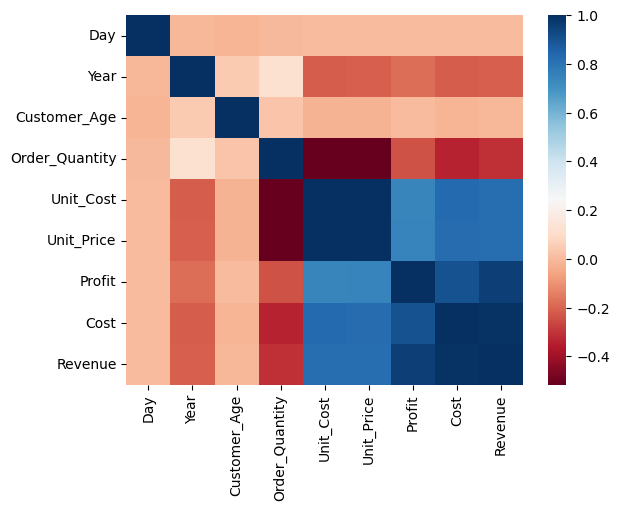

In [86]:
sns.heatmap(corr, cmap='RdBu')
plt.show()

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

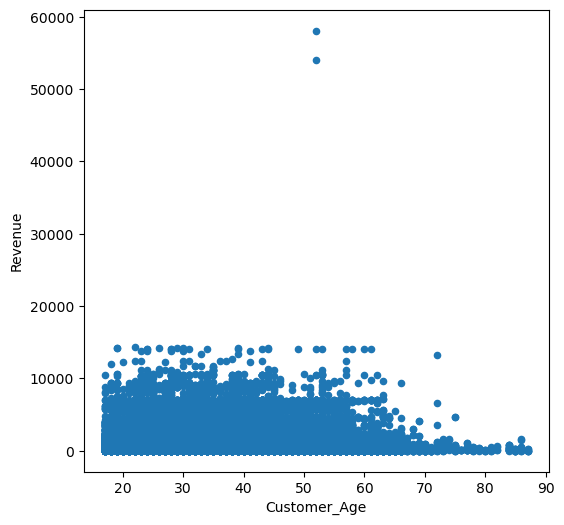

In [90]:
df.plot(kind = 'scatter', x='Customer_Age', y='Revenue',figsize=(6,6))

**NOT**:
Ne yapar?

Bir dağılım grafiği (scatter plot) çizer.

X eksenine: Müşteri yaşı (Customer_Age)

Y eksenine: Gelir (Revenue)

Her bir nokta, veri setindeki bir müşteriyi temsil eder. Noktalar bir doğru boyunca diziliyorsa → arada pozitif ya da negatif korelasyon olabilir.

Yaş arttıkça gelir artıyorsa → pozitif korelasyon.

Yaş arttıkça gelir azalıyorsa → negatif korelasyon.

Noktalar dağınık ve rastgele ise → ilişki yok

<Axes: xlabel='Revenue', ylabel='Profit'>

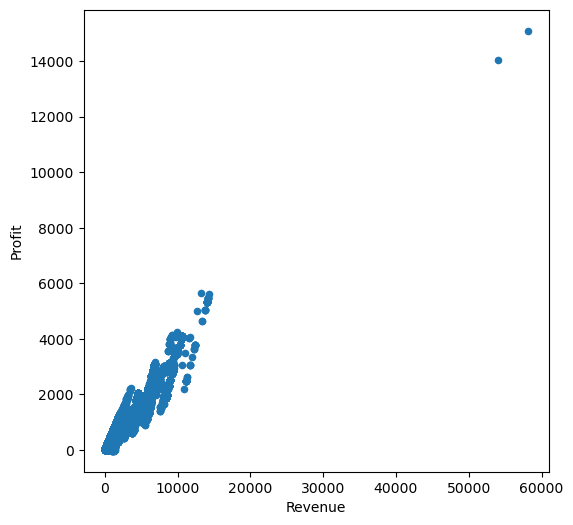

In [93]:
df.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

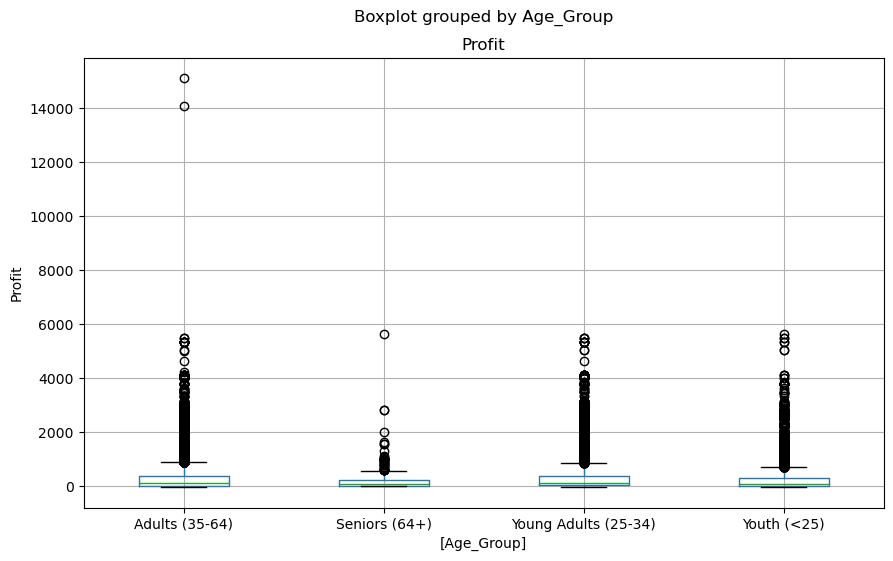

In [97]:
ax = df[['Profit','Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

**NOT**: Bu boxplot (kutu grafiği), veri analizi sürecinde çok güçlü bir araçtır çünkü kategorik bir değişkenle sayısal bir değişkenin dağılımını karşılaştırmalı olarak görmemizi sağlar. 

Kutuların boyutu ne kadar büyükse → o kadar fazla değişkenlik vardır.

Küçük kutular → daha tutarlı bir dağılım.

Her yaş grubunun kâr dağılımını kıyaslar.
Örneğin: '26–35' yaş grubu genelde daha yüksek kâr mı getiriyor?'46–55' yaş grubunun kârı daha mı tutarlı?

Year                 Axes(0.125,0.53;0.227941x0.35)
Customer_Age      Axes(0.398529,0.53;0.227941x0.35)
Order_Quantity    Axes(0.672059,0.53;0.227941x0.35)
Unit_Cost            Axes(0.125,0.11;0.227941x0.35)
Unit_Price        Axes(0.398529,0.11;0.227941x0.35)
Profit            Axes(0.672059,0.11;0.227941x0.35)
dtype: object

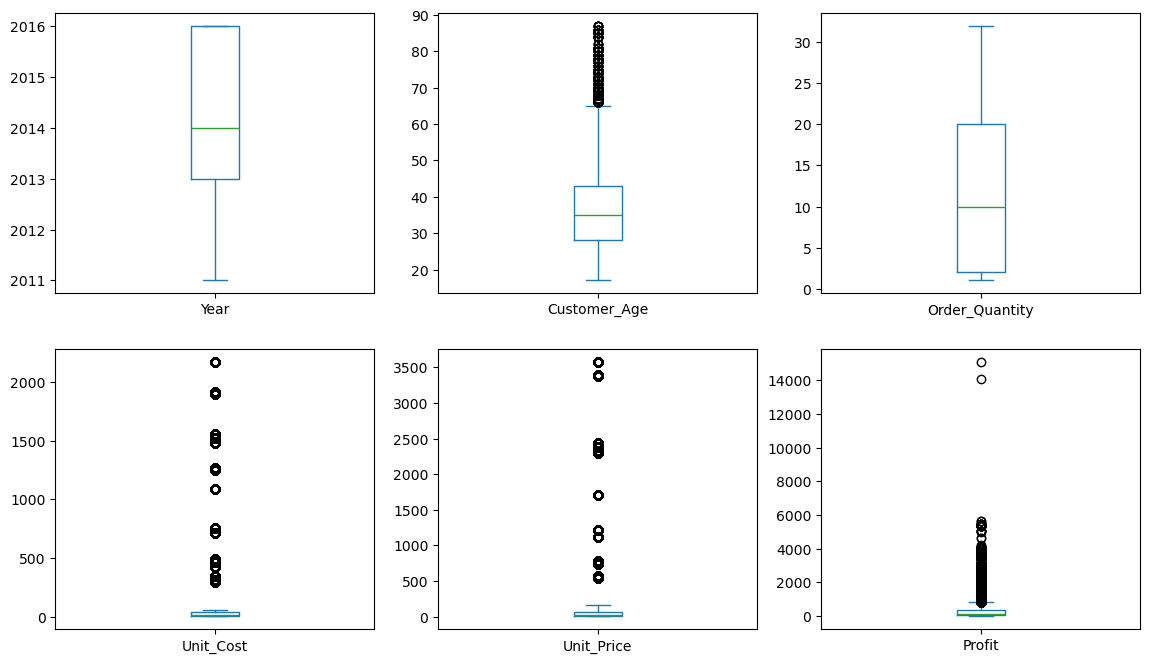

In [100]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

**NOT**: Parametre	Açıklama
kind='box'	Tüm seçilen sütunlar için boxplot (kutu grafiği) çizer.

subplots=True	Her sütun için ayrı bir grafik çizilir (tek bir büyük kutu yerine ayrı ayrı).

Bu komutla birlikte çoklu boxplot’lar oluşturarak verinin genel yapısını aynı anda ve görsel olarak analiz edebiliyoruz. Bu tür görselleştirme, veri bilimi projelerinde "veriyi tanıma (exploratory data analysis – EDA)" aşamasında altın değerindedir. 

 <span style="color: blue; font-weight: bold;">Column wrangling</span> 
 
We can also create new columns or modify existing ones.

**Add and calculate a new Revenue_per_Age column**

In [109]:
df['Revenue_per_Age'] = df['Revenue'] / df['Customer_Age']

df['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

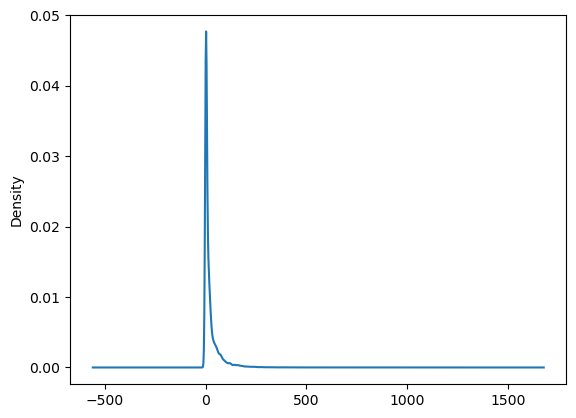

In [111]:
df['Revenue_per_Age'].plot(kind='density')

<Axes: ylabel='Frequency'>

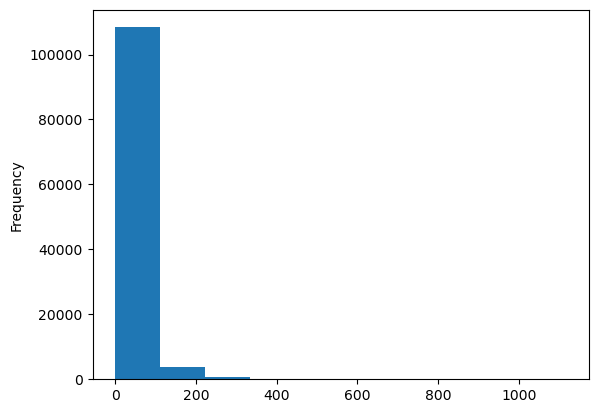

In [113]:
df['Revenue_per_Age'].plot(kind='hist')

**Add and calculate a new Calculated_Cost column**

In [118]:
df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']
df['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [155]:
(df['Calculated_Cost'] != df['Cost']).sum()

0

**NOT**:Kaç satırda hesapladığın maliyet ile veri setindeki maliyet sütunu uyuşmuyor? durumunu kontrol ettik

Cost ve Profit arasındaki ilişkiyi scatter grafiği ile görebiliriz.

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

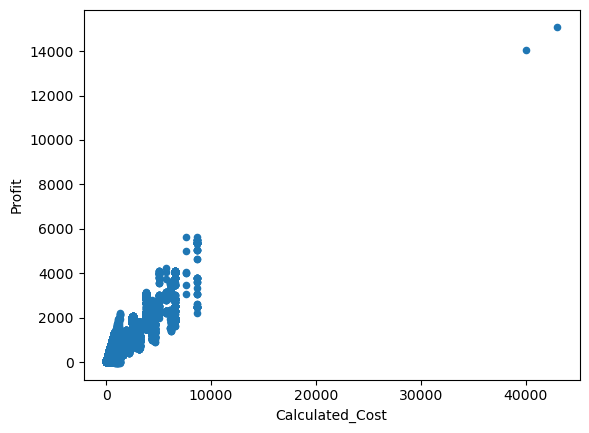

In [127]:
df.plot(kind='scatter', x='Calculated_Cost', y='Profit')

**Add and calculate a new Calculated_Revenue column**

In [132]:
df['Calculated_Revenue'] = df['Cost'] + df['Profit']

df['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [134]:
(df['Calculated_Revenue'] != df['Revenue']).sum()

0

In [136]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

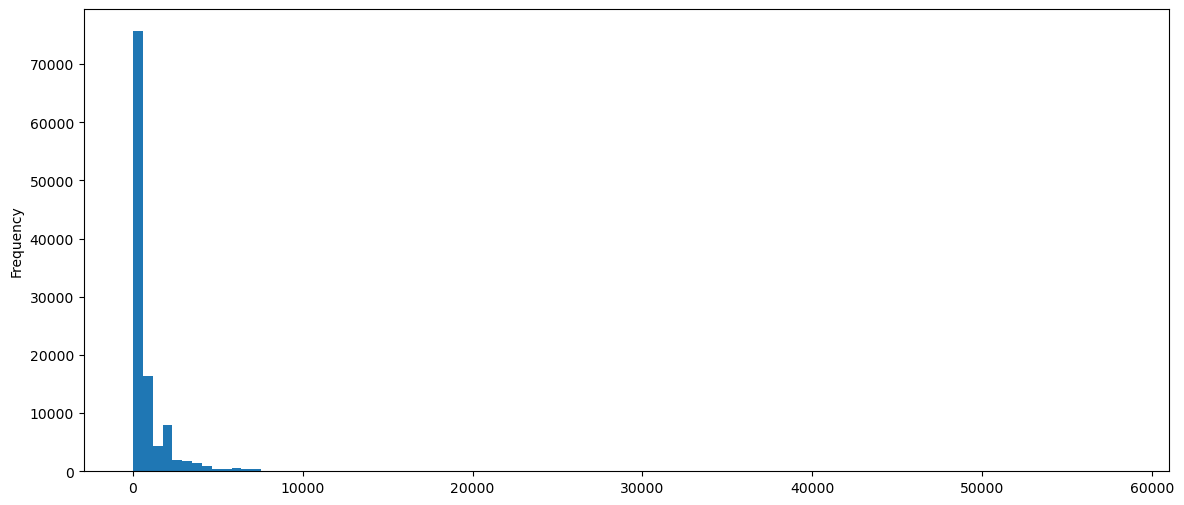

In [140]:
df['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

**Modify all Unit_Price values adding 3% tax to them**

In [145]:
df['Unit_Price'] *=1.03

In [153]:
df['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

 <span style="color: blue; font-weight: bold;">Selection & Indexing:</span>

**Get all the sales made in the state of Kentucky**

In [160]:
df.loc[df['State']=='Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


**Get the mean revenue of the Adults (35-64) sales group**

In [163]:
df.loc[df['Age_Group']=='Adults (35-64)','Revenue'].mean()

762.8287654055604

**How many records belong to Age Group Youth (<25) or Adults (35-64)?**

In [168]:
df.loc[(df['Age_Group'] == 'Youth (<25)') | (df['Age_Group'] == 'Adults (35-64)')].shape[0]

73652